In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [3]:
df=pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df.isna().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [5]:
df.dropna(inplace=True)

In [6]:
df.isna().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [7]:
df.shape

(714, 3)

In [8]:
X=df.drop('Survived',axis=1)
y=df['Survived']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [9]:
X_train.head()

,Age,Fare
328,31.0,20.5250
73,26.0,14.4542
253,30.0,16.1000
719,33.0,7.7750
666,25.0,13.0000


In [10]:
clf=DecisionTreeClassifier()
clf.fit(X_train,y_train)
predict=clf.predict(X_test)

In [11]:
accuracy_score(y_test,predict)

0.6293706293706294

In [12]:
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

0.6260758998435054

In [26]:
k_bin_age=KBinsDiscretizer(n_bins=5,encode='ordinal',strategy='kmeans')
k_bin_fare=KBinsDiscretizer(n_bins=5,encode='ordinal',strategy='kmeans')

In [27]:
trf=ColumnTransformer([
    ('first',k_bin_age,[0]),
    ('second',k_bin_fare,[1])
])

In [28]:

X_train_trf=trf.fit_transform(X_train)
X_test_trf=trf.transform(X_test)

In [29]:
trf.named_transformers_['first'].n_bins_

array([5])

In [30]:
trf.named_transformers_['second'].n_bins_

array([5])

In [31]:
trf.named_transformers_['first'].bin_edges_

array([array([ 0.42      , 12.69636862, 27.02765256, 39.35418895, 54.21464646,
              80.        ])                                                   ],
      dtype=object)

In [32]:
def discretize(bins,strategy):
    kbin_age=KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare=KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)

    trf=ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])

    X_trf=trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy')))

    plt.figure(figsize=(14,4))
    plt.subplot(1,2,1)
    sns.histplot(X['Age'],kde=True)
    plt.title('Before')

    plt.subplot(1,2,2)
    sns.histplot(X_trf[:,0],color='red',kde=True)
    plt.title("After")

    plt.show()

    plt.figure(figsize=(14,4))
    plt.subplot(1,2,1)
    sns.histplot(X['Fare'],kde=True)
    plt.title('Before')

    plt.subplot(1,2,2)
    sns.histplot(X_trf[:,1],color='red',kde=True)
    plt.title("After")

    plt.show()
    

0.6317097026604068


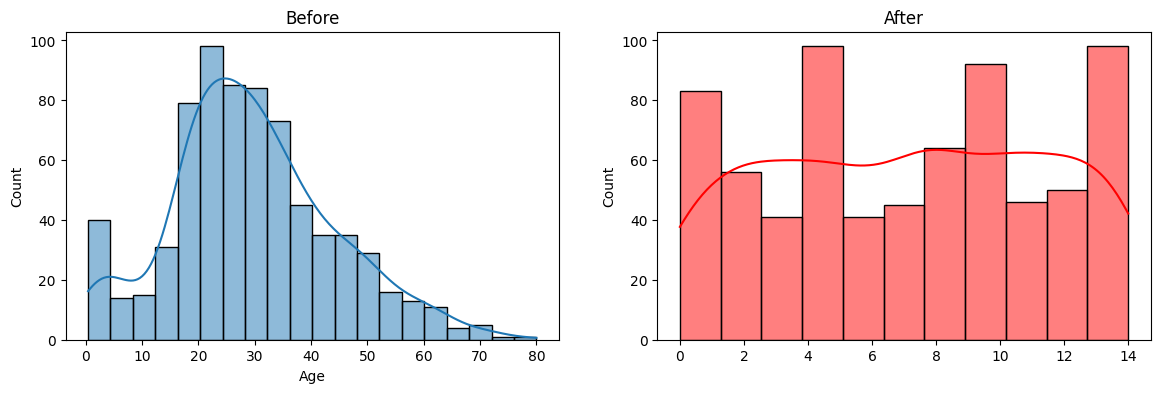

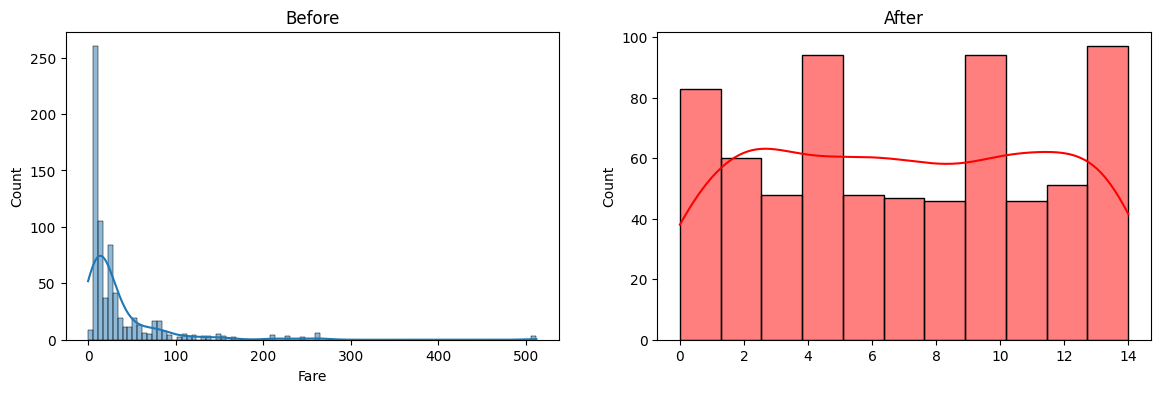

In [40]:
discretize(15,'quantile')

0.6303208137715179


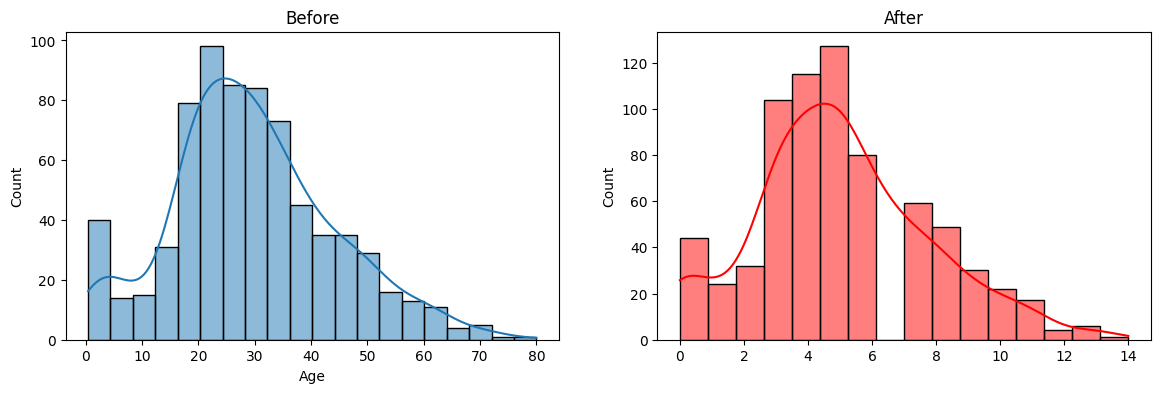

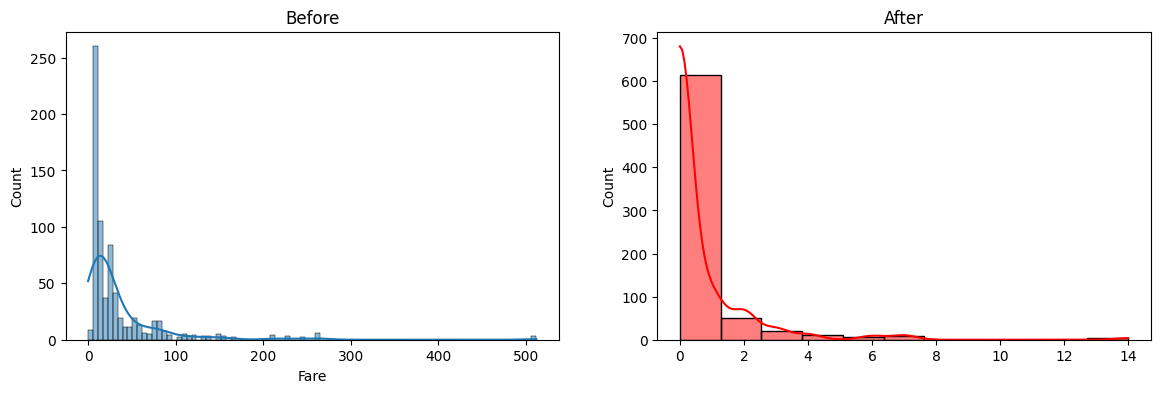

In [43]:
discretize(15,'uniform')

0.6359154929577465


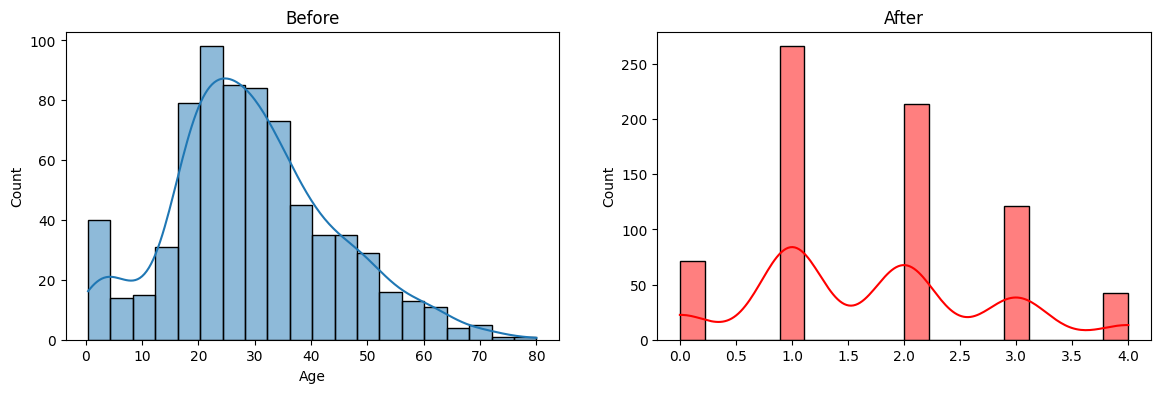

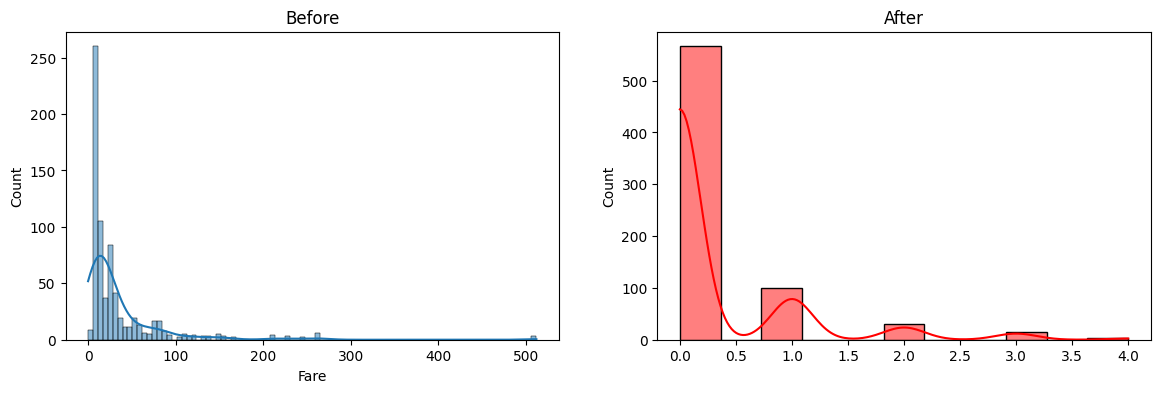

In [46]:
discretize(5,'kmeans')